<a href="https://colab.research.google.com/github/SeptiLutfiana/MESIN-LEARNING/blob/main/Pertemuan10_Tugas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Nama : Septi Lutfiana
- NIM: 2141720038
- Kelas : 3H TI

In [1]:
import tensorflow as tf

# Buat model sederhana
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Definisikan optimizer
optimizer = tf.keras.optimizers.Adam()

# Definisikan loss function
loss_function = tf.keras.losses.SparseCategoricalCrossentropy()

# Data latih (contoh sederhana)
(x_train, y_train), _ = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 784).astype('float32') / 255.0
y_train = y_train.astype('int64')

# Training loop
epochs = 5
batch_size = 32

for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")
    for step in range(0, len(x_train), batch_size):
        x_batch = x_train[step:step+batch_size]
        y_batch = y_train[step:step+batch_size]

        with tf.GradientTape() as tape:
            # Lakukan prediksi menggunakan model
            predictions = model(x_batch)

            # Hitung loss
            loss = loss_function(y_batch, predictions)

        # Menghitung gradien loss terhadap parameter model
        gradients = tape.gradient(loss, model.trainable_variables)

        # Terapkan gradien menggunakan optimizer
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        # Tampilkan statistik
        if step % 1000 == 0:
            print(f"  Step {step}: Loss: {loss.numpy()}")

print("Training selesai.")


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5


  Step 0: Loss: 2.321664810180664
  Step 4000: Loss: 0.2958593964576721
  Step 8000: Loss: 0.3752005994319916
  Step 12000: Loss: 0.24183955788612366
  Step 16000: Loss: 0.34199175238609314
  Step 20000: Loss: 0.36057186126708984
  Step 24000: Loss: 0.15730951726436615
  Step 28000: Loss: 0.16118204593658447
  Step 32000: Loss: 0.44648265838623047
  Step 36000: Loss: 0.16383205354213715
  Step 40000: Loss: 0.12990128993988037
  Step 44000: Loss: 0.048649996519088745
  Step 48000: Loss: 0.21035094559192657
  Step 52000: Loss: 0.07824259996414185
  Step 56000: Loss: 0.26119527220726013
Epoch 2/5
  Step 0: Loss: 0.09588039666414261
  Step 4000: Loss: 0.09213491529226303
  Step 8000: Loss: 0.11504863947629929
  Step 12000: Loss: 0.1907556653022766
  Step 16000: Loss: 0.16367463767528534
  Step 20000: Loss: 0.2031191885471344
  Step 24000: Loss: 0.06976231932640076
  Step 28000: Loss: 0.1232275664806366
  Step 32000: Loss: 0.3188035488128662
  Step 36000: Loss: 0.11038348078727722
  Step 40

In [2]:
import tensorflow as tf

import matplotlib.pyplot as plt

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
# The actual line
TRUE_W = 3.0
TRUE_B = 2.0

NUM_EXAMPLES = 201

# A vector of random x values
x = tf.linspace(-2,2, NUM_EXAMPLES)
x = tf.cast(x, tf.float32)

def f(x):
  return x * TRUE_W + TRUE_B

# Generate some noise
noise = tf.random.normal(shape=[NUM_EXAMPLES])

# Calculate y
y = f(x) + noise

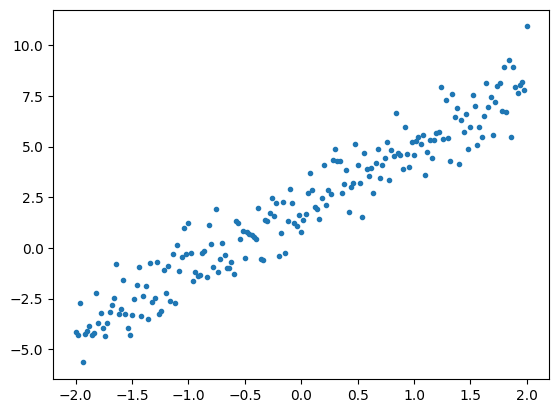

In [4]:
# Plot all the data
plt.plot(x, y, '.')
plt.show()

In [5]:
class MyModel(tf.Module):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)
    # Initialize the weights to `5.0` and the bias to `0.0`
    # In practice, these should be randomly initialized
    self.w = tf.Variable(5.0)
    self.b = tf.Variable(0.0)

  def __call__(self, x):
    return self.w * x + self.b

model = MyModel()

# List the variables tf.modules's built-in variable aggregation.
print("Variables:", model.variables)

# Verify the model works
assert model(3.0).numpy() == 15.0

Variables: (<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0>)


In [6]:
# This computes a single loss value for an entire batch
def loss(target_y, predicted_y):
  return tf.reduce_mean(tf.square(target_y - predicted_y))

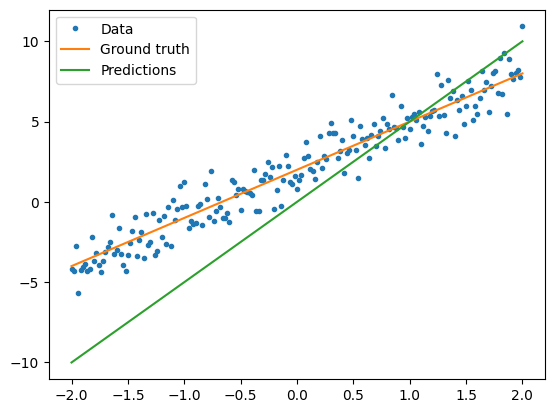

Current loss: 10.074668


In [7]:
plt.plot(x, y, '.', label="Data")
plt.plot(x, f(x), label="Ground truth")
plt.plot(x, model(x), label="Predictions")
plt.legend()
plt.show()

print("Current loss: %1.6f" % loss(y, model(x)).numpy())

In [8]:
class CustomTraining(MyModel):
  @tf.function
  def train_step(self, inputs):
    inputs, labels = inputs
    with tf.GradientTape() as tape:
      predictions = self(inputs, training=True)
      loss = self.loss(labels, predictions)
      grads = tape.gradient(loss, model.trainable_variables)
      self.optimizer.apply_gradients(zip(grads, model.trainable_variables))
      return {'loss': loss}



In [9]:
model = CustomTraining(
    vocab_size=len(ids_from_chars.get_vocabulary()),
    embedding_dim=embedding_dim,
    rnn_units=rnn_units)

NameError: ignored